In [10]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('SPAM text message 20170820 - Data.csv')

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', None)])

parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf': [LogisticRegressionCV(cv=4 , solver='newton-cg', scoring='roc_auc'),
            SVC(gamma='auto'), BernoulliNB()],
}

clf = GridSearchCV(clf, parameters, cv=4, scoring='roc_auc')


X = df['Message']
Y = pd.get_dummies(df['Category'])['spam']

x_train, x_test, y_train, y_test = train_test_split(X, Y)

clf.fit(x_train, y_train)
print(clf.best_params_)
print(f'score: {clf.score(x_test, y_test)}')


{'clf': LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='newton-cg', tol=0.0001, verbose=0), 'tfidf__ngram_range': (1, 1)}
score: 0.9905018156363476


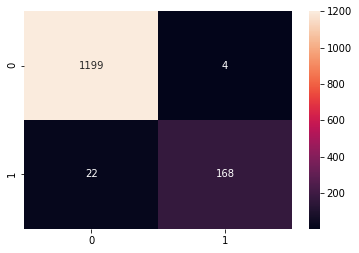

     Category                                            Message  true_result  \
4180      ham                 Can ü send me a copy of da report?            0   
3598     spam  Congratulations YOU'VE Won. You're a Winner in...            1   
3688      ham             Great! I shoot big loads so get ready!            0   
684      spam  Hi I'm sue. I am 20 years old and work as a la...            1   
990       ham  Ugh. Gotta drive back to sd from la. My butt i...            0   
831      spam  U have a secret admirer. REVEAL who thinks U R...            1   
2979      ham  Yar lor... Keep raining non stop... Or u wan 2...            0   
4348     spam  U 447801259231 have a secret admirer who is lo...            1   
2172      ham                      I wont. So wat's wit the guys            0   
5402      ham  Hi babe its me thanks for coming even though i...            0   

      model_perdict  
4180              0  
3598              1  
3688              0  
684               1 

In [11]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

samples = df.loc[y_test.index].copy()
samples['true_result'] = y_test
samples['model_perdict'] = y_pred
print(samples.sample(n=10))
